### Comparing Classical methods of training models with Statistical Methods [Logical Regression vs Decision Trees]

Import Modules


In [30]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import graphviz

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tst
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [9]:
arr = [1,2,3,4,5,6,7,8,9,0]
print(arr[::2])

[1, 3, 5, 7, 9]


In [42]:
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [43]:
X_train, X_test, y_train, y_test=tst(X,y,test_size = 0.3, random_state=42)

In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
xx,yy = np.meshgrid(
    np.arange(X[:,0].min() - 0.5,X[:,0].max()+0.5,0.02),
    np.arange(X[:,1].min() - 0.5,X[:,1].max()+0.5,0.02)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]

items = lr.predict(grid_points)
items = items.reshape(xx.shape)

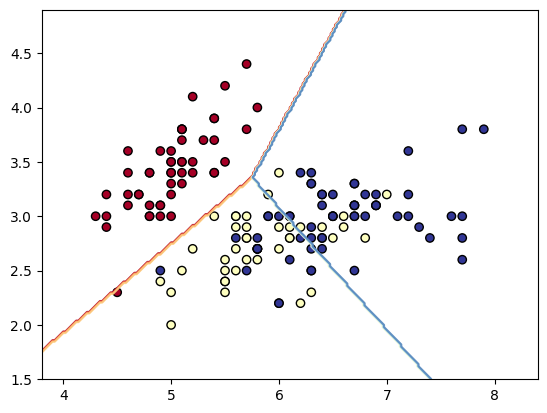

In [46]:
plt.figure()
plt.contour(xx,yy,items, alpha = 0.8,cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')

plt.show()

Classical Approach: Decision Trees

In [47]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

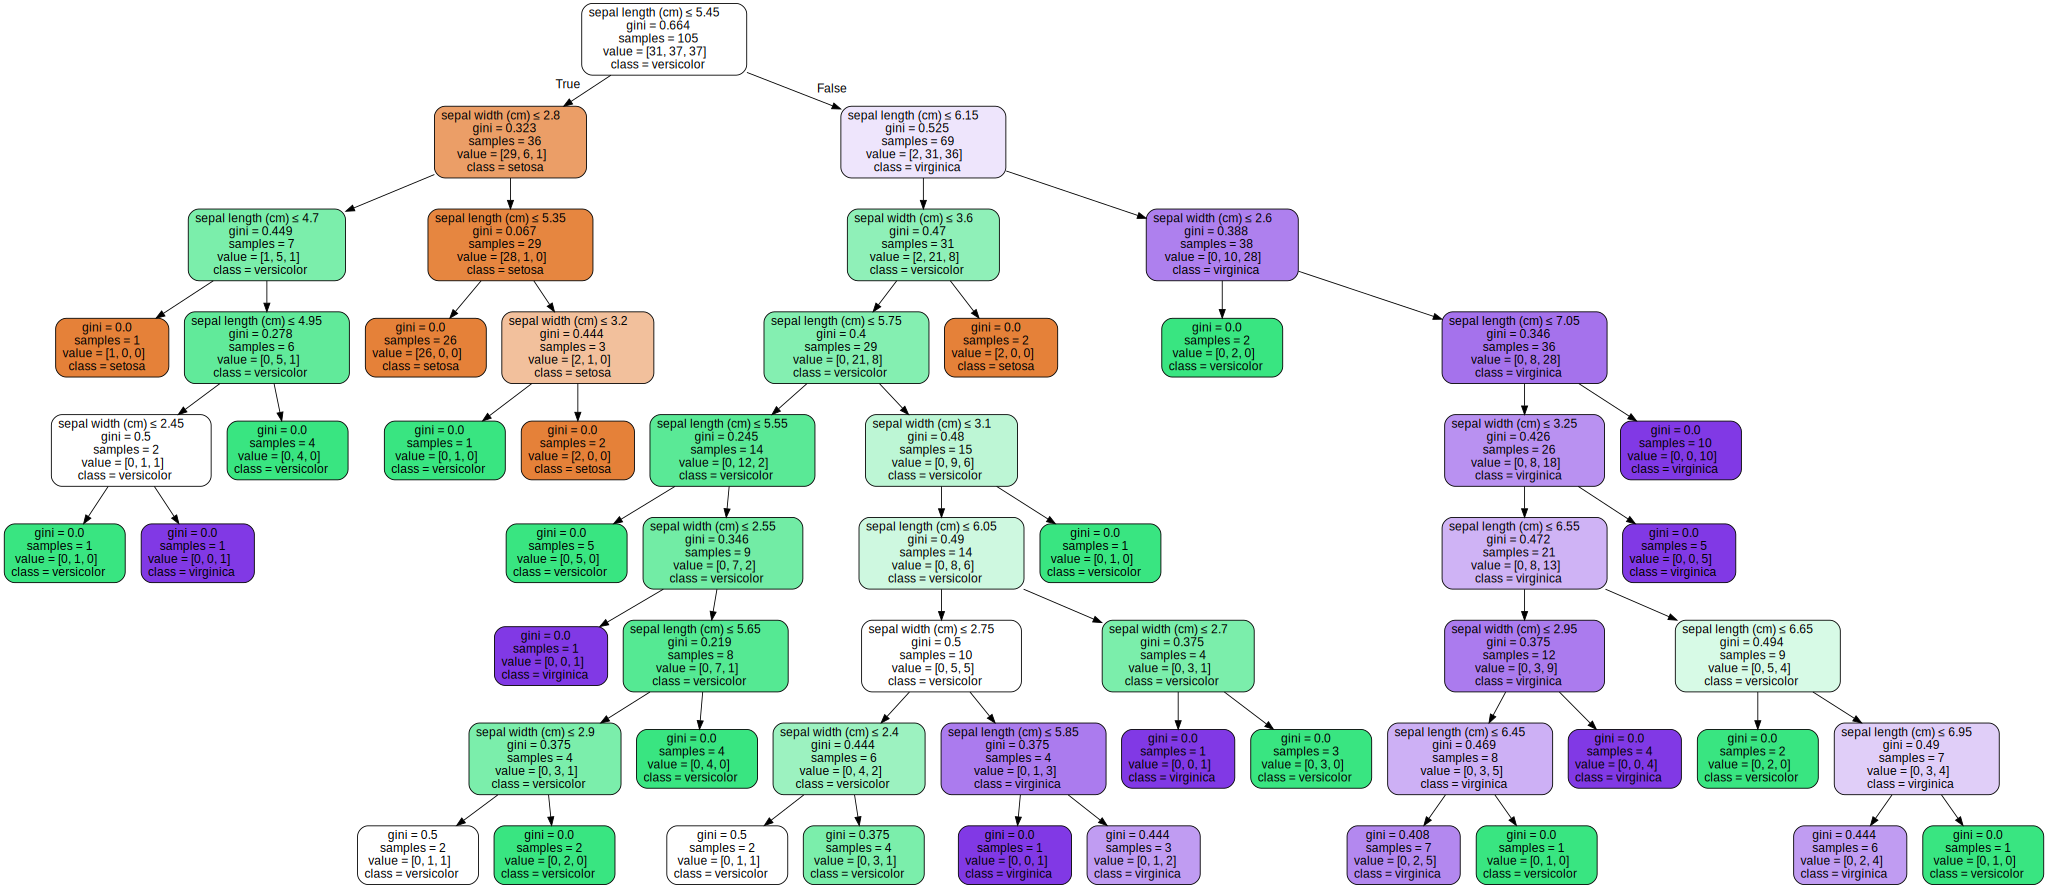

In [48]:
tree_data = export_graphviz(
    dt,feature_names = iris.feature_names[:2],class_names = iris.target_names,filled=True,rounded=True,special_characters=True
)

graph = graphviz.Source(tree_data)
graph.render('iris')
graph